In [1]:
import pandas as pd

species_data = pd.read_csv('species_info.csv')

SyntaxError: invalid syntax (<ipython-input-1-57d0f6d24eb2>, line 1)

In [2]:
import pandas as pd

species_data = pd.read_csv('species_info.csv')
observation_data = pd.read_csv('observations.csv')

In [3]:
print(species_data.head())
print(observation_data.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [4]:
print(species_data.isna().sum().sum())

5633


In [5]:
print(species_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [7]:
print(observation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [8]:
print(species_data.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [9]:
species_data = species_data.fillna(value={'conservation_status'='Unknown'})

SyntaxError: invalid syntax (<ipython-input-9-d1efa4004f0d>, line 1)

In [10]:
species_data = species_data.fillna(value={'conservation_status':'Unknown'})

In [11]:
print(species_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [12]:
combined_data = species_data.join(observation_data)

ValueError: columns overlap but no suffix specified: Index(['scientific_name'], dtype='object')

In [13]:
combined_data = species_data.join(observation_data, rsuffix='_obs')

In [14]:
print(combined_data.info())
print(combined_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
 4   scientific_name_obs  5824 non-null   object
 5   park_name            5824 non-null   object
 6   observations         5824 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 318.6+ KB
None
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed V

In [15]:
combined_data = observation_data.join(species_data, rsuffix='_species')

In [16]:
print(combined_data.info())
print(combined_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   scientific_name          23296 non-null  object
 1   park_name                23296 non-null  object
 2   observations             23296 non-null  int64 
 3   category                 5824 non-null   object
 4   scientific_name_species  5824 non-null   object
 5   common_names             5824 non-null   object
 6   conservation_status      5824 non-null   object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB
None
            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specula

In [17]:
combined_data = species_data.join(observation_data, rsuffix='_obs')

In [18]:
import seaborn as sns

NameError: name 'plt' is not defined

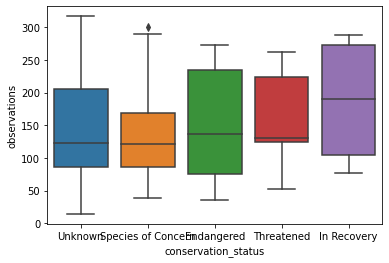

In [19]:
sns.boxplot(x = combined_data.conservation_status, y = combined_data.observations)
plt.show()
plt.clf

In [20]:
import matplotlib.pyplot as plt

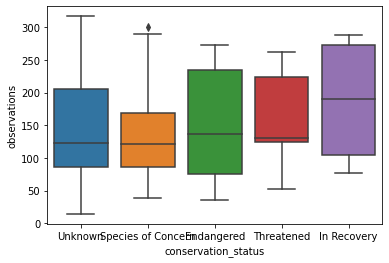

<Figure size 432x288 with 0 Axes>

In [21]:
plt.clf()
sns.boxplot(x = combined_data.conservation_status, y = combined_data.observations)
plt.show()
plt.clf()

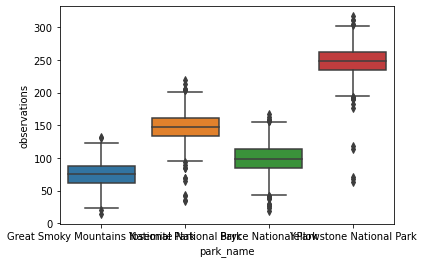

<Figure size 432x288 with 0 Axes>

In [22]:
sns.boxplot(x = combined_data.park_name, y = combined_data.observations)
plt.show()
plt.clf()

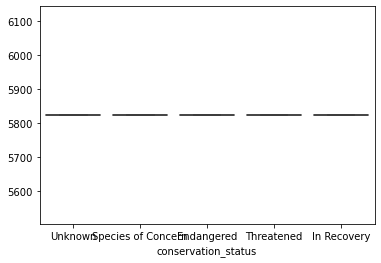

<Figure size 432x288 with 0 Axes>

In [23]:
sns.boxplot(x = combined_data.conservation_status, y = combined_data.conservation_status.count())
plt.show()
plt.clf()

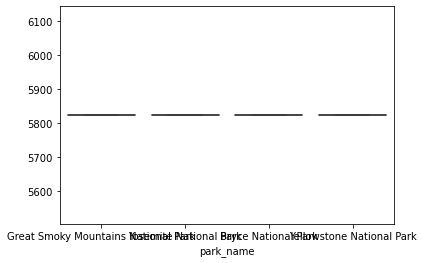

<Figure size 432x288 with 0 Axes>

In [24]:
sns.boxplot(x = combined_data.park_name, y = combined_data.conservation_status.count())
plt.show()
plt.clf()

In [25]:
sns.boxplot(x = combined_data.park_name, y = combined_data.conservation_status.groupby('park_name').count())
plt.show()
plt.clf()

KeyError: 'park_name'